# `pip` basics

The **“[PyPI - The Python Package Index](https://pypi.org/)“** is a repository of software packages for Python. 

When you install a package with pip the package gets downloaded from **“[PyPI - The Python Package Index](https://pypi.org/)“** unless some other repository or location is configured explicitly.

**Official doc: [pip documentation v24.3.1](https://pip.pypa.io/en/stable/)**

**`python -m pip install arrow`**

This installs the package `arrow` and its required dependencies.

In this case, `arrow` version `1.2.3` and its dependencies `python-dateutil 2.8.2` & `six 1.16.0` got installed.

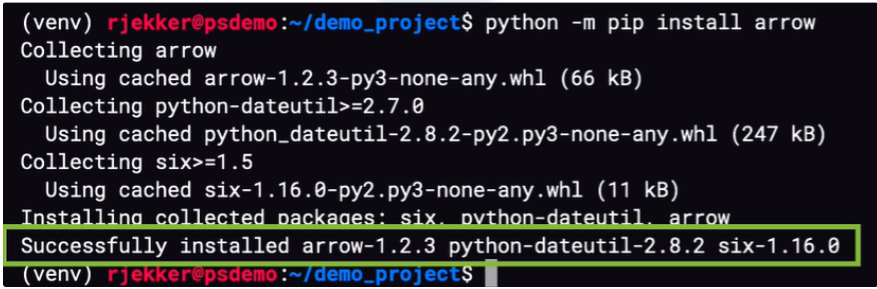

**`python -m pip show arrow`**

The show command is used to inspect the properties of an installed package, such as:
* Installed version of the package
* location the package files have been saved, etc.

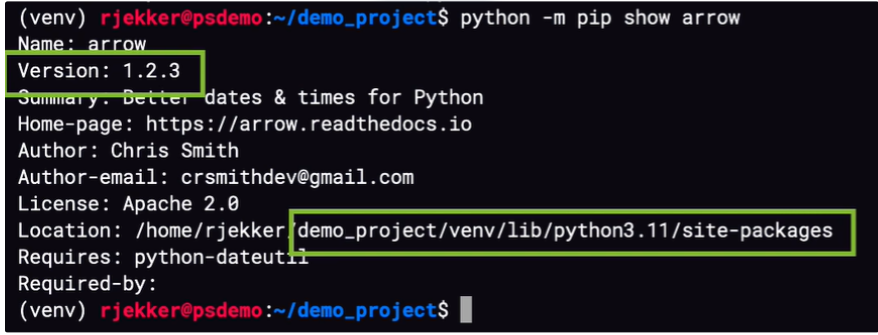

**`python -m pip uninstall arrow`**

To remove an installed python package but it **doesn’t remove the dependencies** that were installed along with this package.

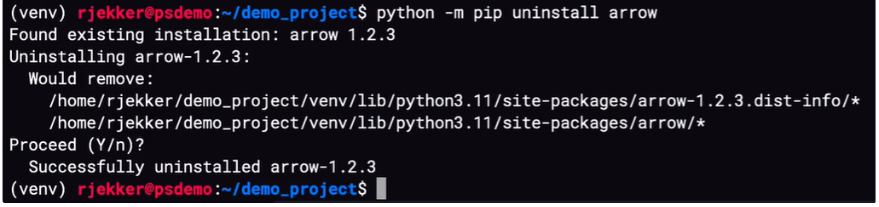

**`python -m pip list`**

To list all the installed packages.

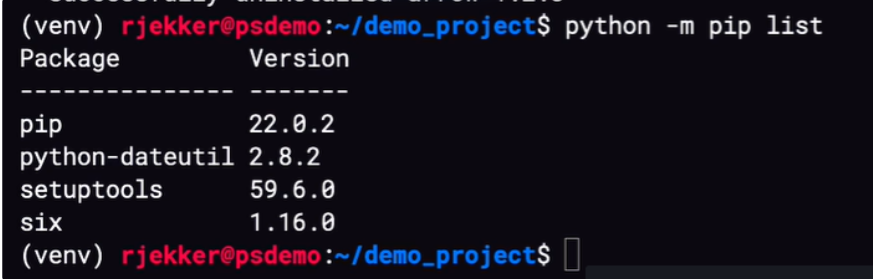

> **NOTE:**
> * *Instead of using `pip` directly, we’re using **“`pthon -m pip`”**.
> * This might not be strictly necessary, but there are cases where the `pip` command is not the correct `pip` for your python version.*
> * *So, using **“`pthon -m pip`”** is a good practice that will prevent any problems.*

# Requirements specifiers: Installing specific versions

We’ll look into the following:
* Installing a specific version of a package
* Version comparison
* Upgrading the package to its latest version

We have already used the `pip install` command. 

Let’s investigate what that command actually means.

**[pip install - pip documentation v24.3.1](https://pip.pypa.io/en/stable/cli/pip_install/)**

If we look at the official doc for the `pip install` command there are several examples of how to use the `pip install` command.

The first one is the pip install followed by a **requirement specifier**.

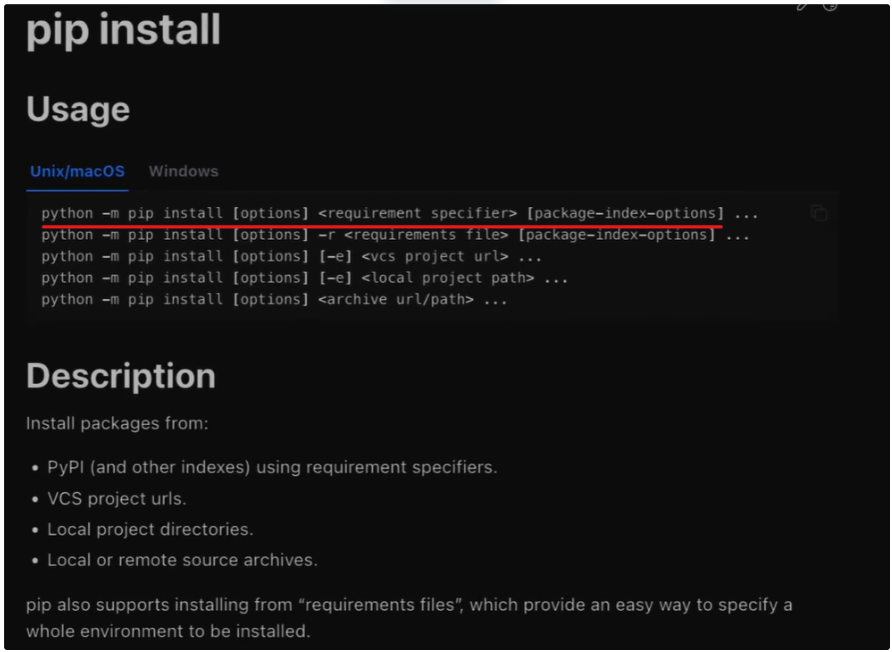

# What is a requirement specifier?

The `pip` supports installing from a package index using a **[requirement specifier](https://pip.pypa.io/en/stable/reference/requirement-specifiers/)**.

Generally speaking, a **requirement specifier** is composed of a project name followed by optional version specifiers. 

A requirement specifier comes in two forms:
* name-based, which is composed of:
    * a package name (e.g. `requests`)
    * optionally, a set of **“extras”** that serve to install optional dependencies (e.g. `security`)
    * optionally, constraints to apply on the version of the package
    * optionally, environment markers
* URL-based, which is composed of:
    * a package name (e.g. `requests`)
    * optionally, a set of “extras” that serve to install optional dependencies (e.g. `security`)
    * a URL for the package
    * optionally, environment markers

**Examples:**

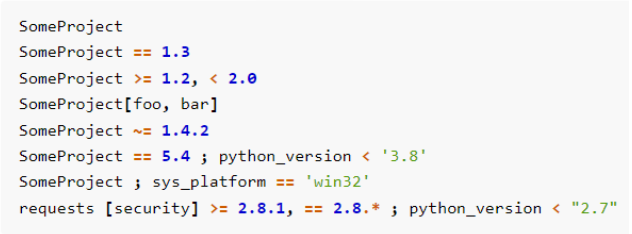

**`python -m pip install “arrow==1.0.0”`**

This uninstalls the currently installed version, if any, and installs the specified version of the package and its dependencies.

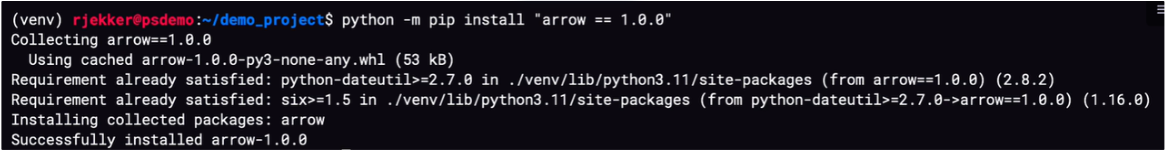

--

If we want to upgrade to the latest version then **`“python -m pip install arrow“`** will not work, since the package is already present in some versions. 

It will not automatically overwrite the current installed version.

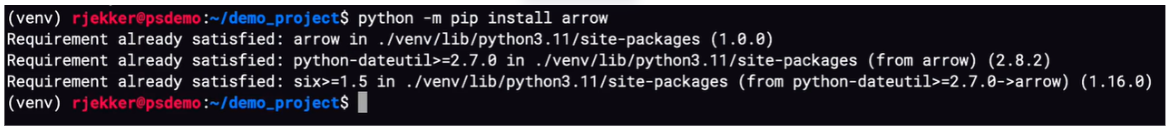

--

**`python -m pip install “arrow==1.2.3”`**

One way is to specify the latest version of the package with the pip install command. For this, we need to know the latest version. 

--

**`python -m pip install --upgrade arrow`**

**`python -m pip install -U arrow`**

* This is a more nicer way to install the latest version, when we don’t know what is the latest version. 
* That is to use the **`--upgrade`** or **`-U`** option.
* This will automatically install whatever latest version is available.
* If we already have a version installed that will get replaced with the latest version.

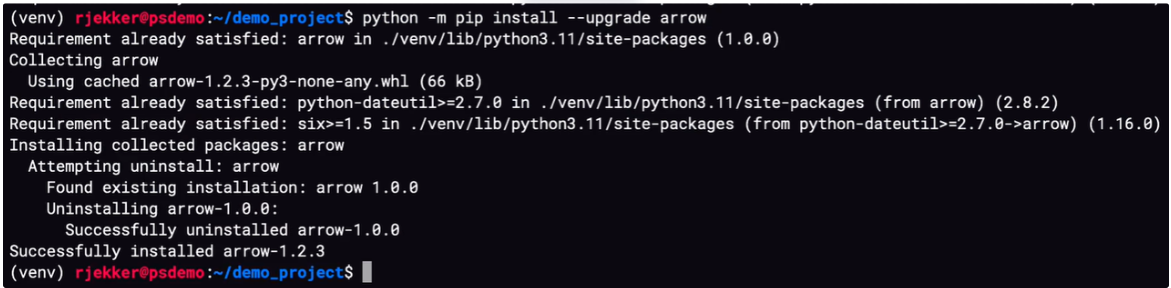

## Version comparison

**`python -m pip install “arrow > 1.0.0, < 3.0.0”`**
* More complex expression. 
* t means installing a version of the arrow package that is later than the `1.0.0` version and before the `3.0.0` version.
* `pip` will select the latest version of the arrow that satisfies the requirement.

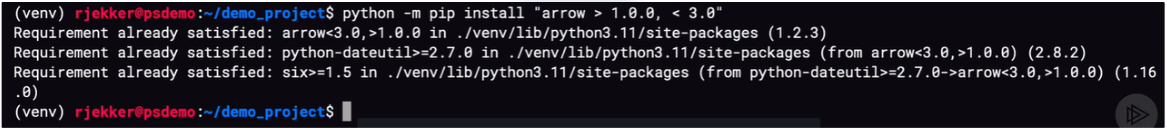

**Why we will write complex comparisons such as → `python -m pip install “arrow > 1.0.0, < 3.0.0”`?**

**Don’t we always want the latest package version?**

For project requirements, things are not so simple and this type of complex comparison help helps to manage the dependencies for the entire project easily.

# Package dependencies

We have seen **how to specify exactly what packages we want to install**. 

Also, packages can have dependencies and those have versions as well. 

We’ll learn the following:
* **How dependencies are defined for packages and how pip knows about them?**
* Also, we’ll look into something called **Extras**, that is **Optional dependencies** that the user can choose to install or not.

As we have seen before when we install a package, its dependencies get automatically installed as well.

## How does pip know which dependencies to be installed?

Each package repository has a “`setup.py`” or “`pyproject.toml`” file also known as **package specification** which contains information about:
* how to install the package?
* what are the required & extras (optional) dependencies?

**`arrow → setup.py`**

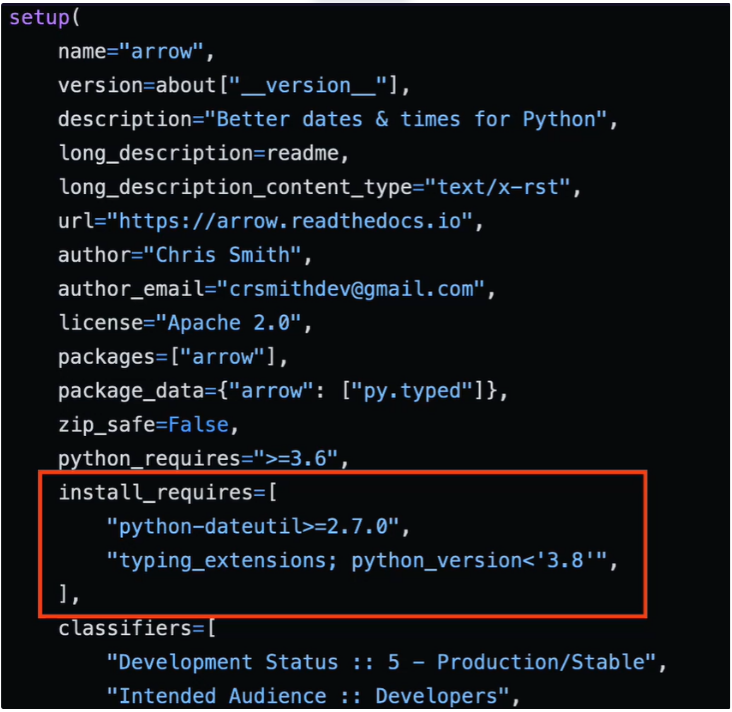

**`fastapi → pyproject.toml`**

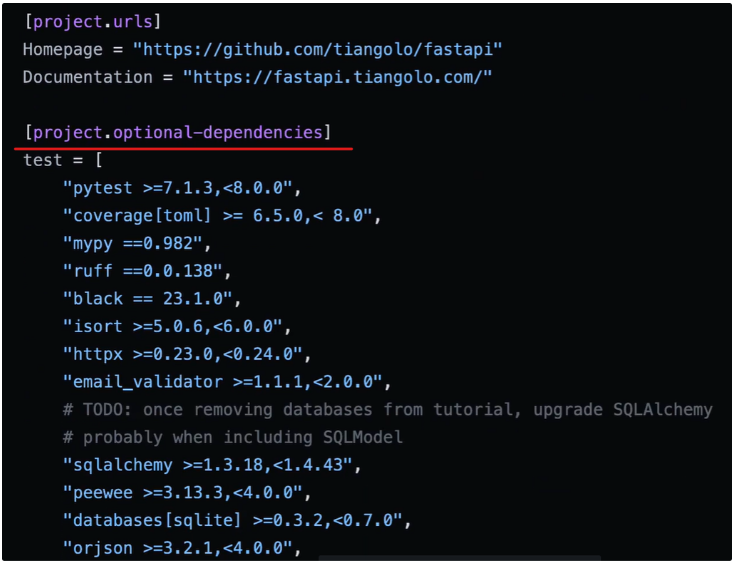

**`Extra - Optional Dependencies`**

These dependencies don’t get installed by default. You’ve to specify them explicitly. 

Notice that there are different groups for these extra dependencies, such as:
* `test` → extra dependencies for running unit tests.
* doc` → extra dependencies for generating HTML documentation.
* `dev` → extra dependencies for development.
* `all` → extra dependencies for complete installation of FastAPI server including things like HTTP server, Jinja template, and more.

To install these **“extras”** dependencies, we need to specify them in square brackets after the package name.

**Syntax → `python -m pip install “fastapi [doc, dev]`”**

This will install all the **extra dependencies** from the `doc` & `dev` group along with `fastapi`.

# Handling packages not hosted on pypi repository

Sometimes you need to install something that is not hosted on **pypi** - the official python package repository. 

## Installing packages from Github

```

python -m pip install “demo_pkg @ git+ssh://git@git.example.com/MyProject”
python -m pip install “demo_pkg @ git+https://git.example.com/MyProject”

# GIT URL Variations
python -m pip install “demo_pkg @ git+https://git.example.com/MyProject.git@master”
python -m pip install “demo_pkg @ git+https://git.example.com/MyProject.git@v1.0”
python -m pip install “demo_pkg @ git+https://git.example.com/MyProject.git@da39a3ee5e6b4b0d3255bfef95601890afd80709”
python -m pip install “demo_pkg @ git+https://git.example.com/MyProject.git@refs/pull/123/head”
```

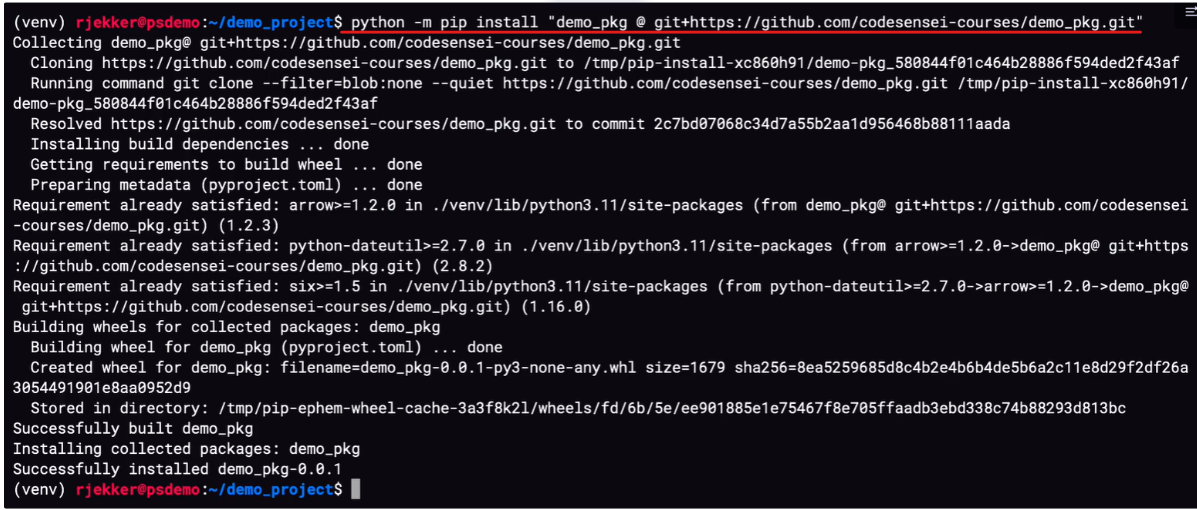

## Installing packages from local file system

```
python -m pip install “demo_pkg @ git+file:///home/user/projects/MyProject”
```

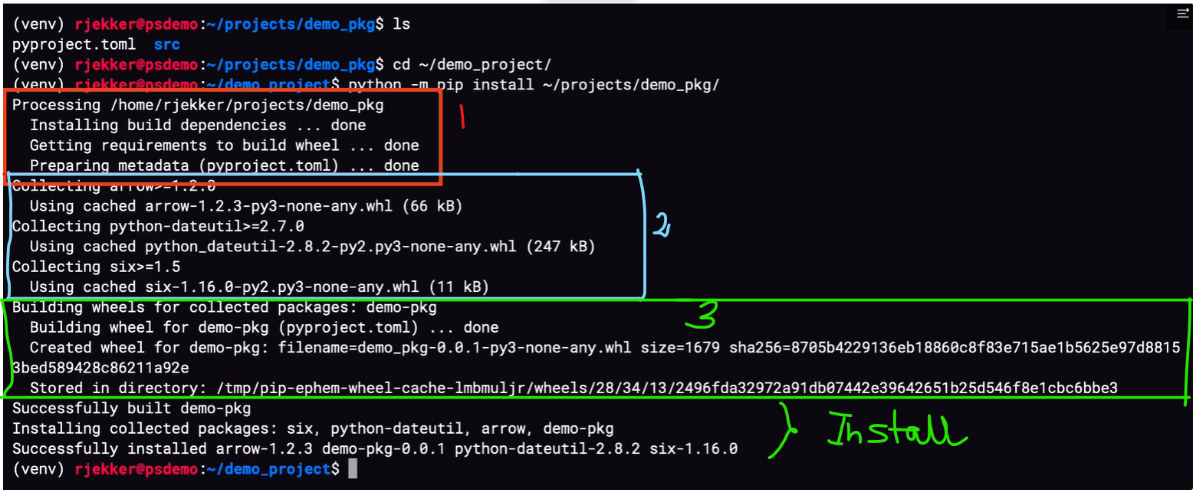

The file `pyproject.toml` makes the package installable and also the project need to adhere to some specific directory structure.
* pip first processes the `pyproject.toml` file.
* collects all the dependencies
* builds an artifact so-called `wheel`, which is an archive file containing the entire project and this is what gets installed.

The wheel artifact is what gets downloaded from pypi when we install a package using pip.

**Download the wheel file using pip**

Using pip, we can also download the wheel file without installing it → **`pip download requests`**

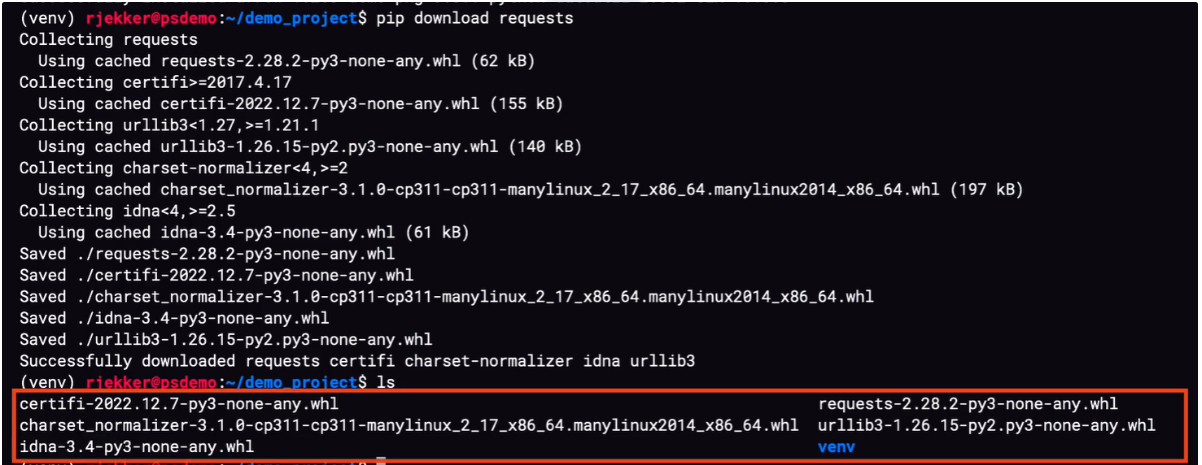

**Install the wheel file using pip**

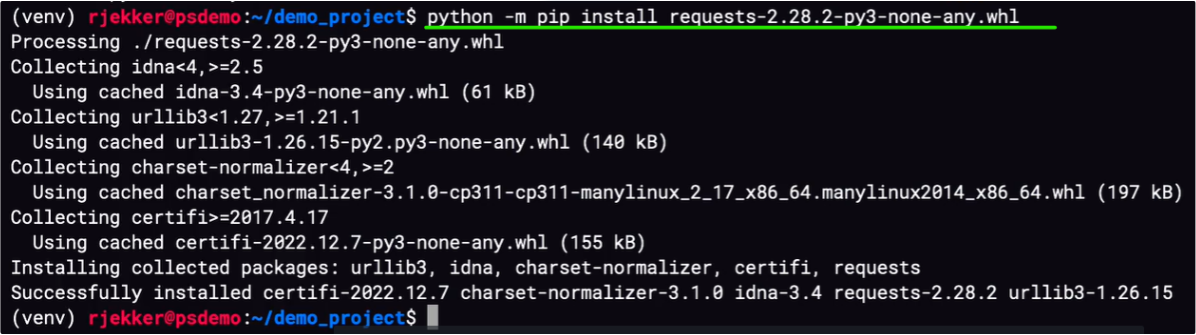

# Editable install

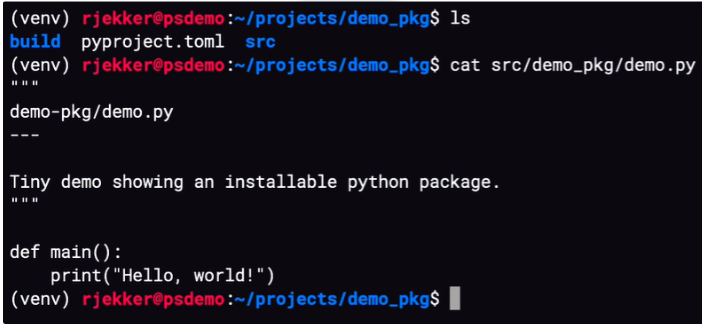

Consider we have installed `demo_pkg` which contains a file called `demo.py` and it has a function called `main( )` which prints **“Hello, World!”**.

This is the main thing that this package defines, a script called **demo** which prints **“Hello, World!”**.

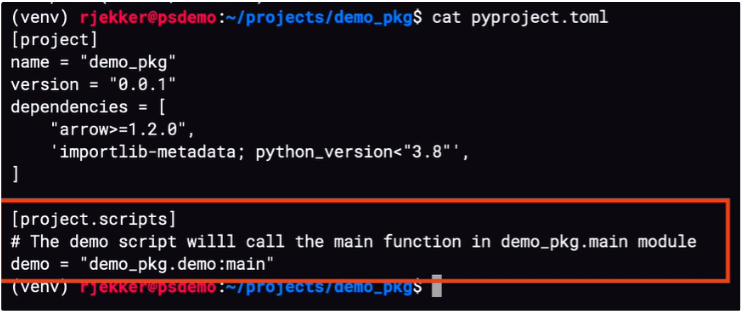

Now, in the `pyproject.toml` file, under the `project.scripts` section there is an entry like → `demo = “demo_pkg.demo:main”`.

So what that statement means is, when `pip` installs `demo_pkg` it will create a script called demo and when that script is run it will call the `main( )` function in `demo_pkg.demo`.

let's try executing the demo script which gets created during the pip install of `demo_pkg`.

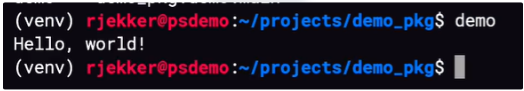

Now suppose the script has been modified.

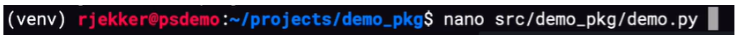

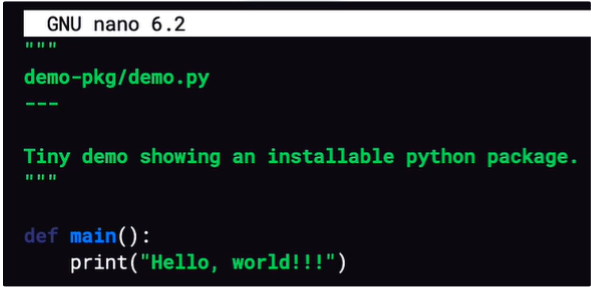

Now to test this new version of the `demo` script, we would have to reinstall the package, and `pi`p will again build a `wheel` and copy the files over to the virtual environment, including the new version of the script.

When developing a package, reinstalling the package to test for every change is rather annoying. We would want to run the script immediately to test the changes.
* To facilitate such requirements, pip can install packages in editable mode. Syntax → `pip install -e <project_path>`
* This allows you to install your project without copying any files in to the virtual environment.
* Instead, the files in the development directory are added to python’s import path.

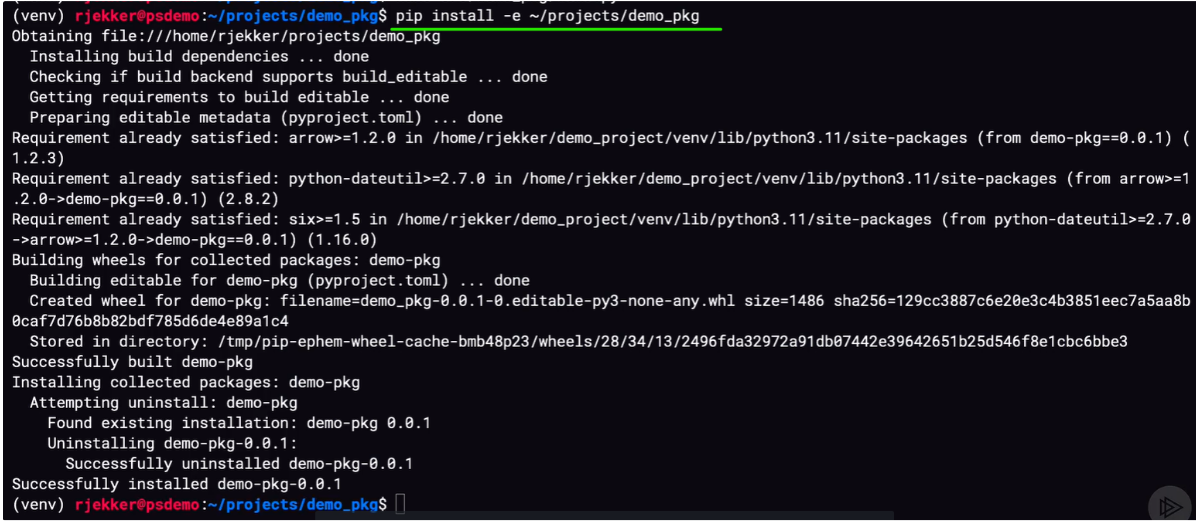

Now every time there is a change in the script, we can directly test it out **without reinstalling `demo_pkg`**.

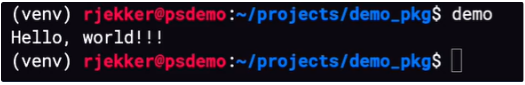

Therefore, during development, we can install the package with the `-e` switch so that any changes in the package are immediately present in the virtual environment and we can test them.

With an **editable install** we only need to perform a **reinstallation**, if there is a change in the **project metadata** in the `pyproject.toml` file.

# Review: Installing packages with pip

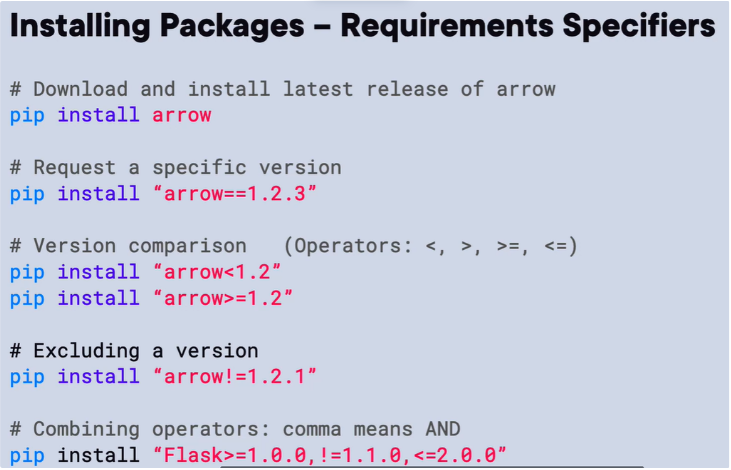

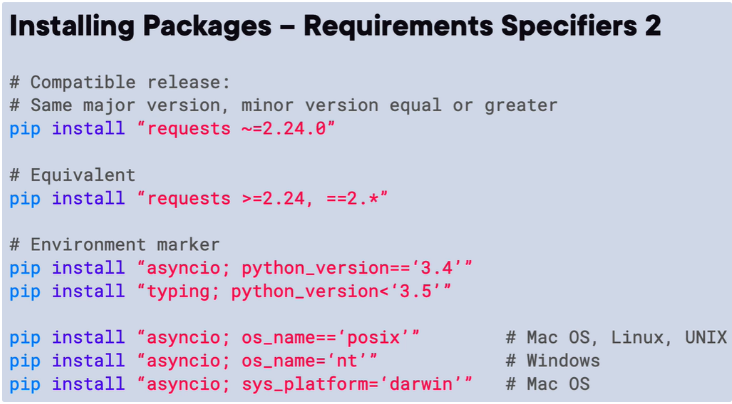

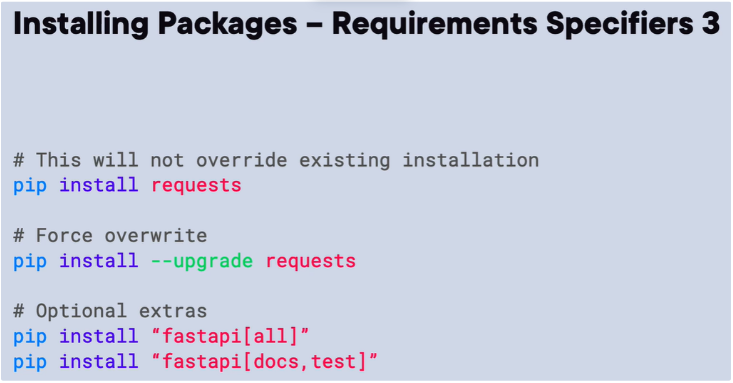

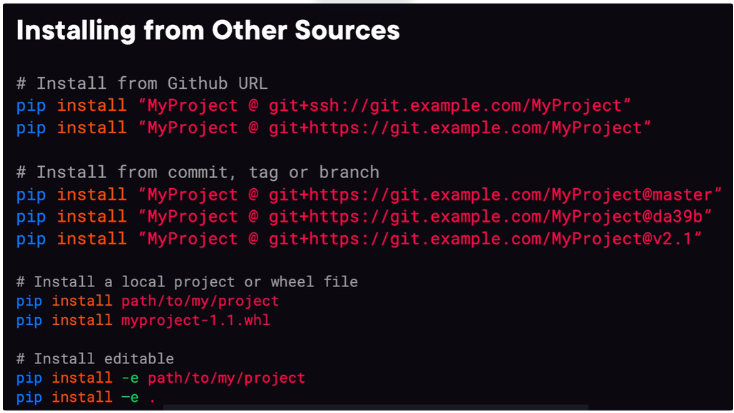


# Configuring pip command

There are certain options for `pip` that you might want to add to every command, in case, if you’re:
* hosting your own package repository
* using a proxy server to access the internet
* need to use custom SSL certificates

Now you can add these options on the command line for pip but you would have to do it for every command. 

So it's nicer to set up a `pip` configuration file. 

If you work for a company that creates lots of packages for internal use, you probably don’t want to upload those to **PyPI**. Instead, you might choose to host them on your own repository using something like **DevPy**. And of third-party packages you might also choose to do a security review and then only add those trusted packages to your own repository. 

You can tell `pip` to use a different repository URL with the `--index-url` switch:
```
pip install requests --index-url http://my-repo.example.com
```
This will make pip download packages from “`http://my-repo.example.com`" instead of the **PyPI repository**.

Of course, having to add such switches to every `pip` command quickly becomes annoying. 

So instead, you can create a **pip config file**.

**[Configuration - pip documentation v24.3.1](https://pip.pypa.io/en/stable/topics/configuration/)**

**`pip` allows a user to change its behavior via 3 mechanisms:**
* command line options
* environment variables
* configuration files

Here we’ll look at the configuration file option.

## Configuration file locations (Windows)

pip’s configuration files are located in fairly standard locations. 

This location is different on different operating systems and has some additional complexity for backward compatibility reasons.

**Global**
* On Windows 7 and later: `C:\ProgramData\pip\pip.ini` (hidden but writeable)
* On Windows Vista: Global configuration is not supported.
* On Windows XP: `C:\Documents and Settings\All Users\Application Data\pip\pip.ini`

**User**
* `%APPDATA%\pip\pip.ini`
* The legacy “per-user” configuration file is also loaded, if it exists: `%HOME%\pip\pip.ini`

**Site**
`%VIRTUAL_ENV%\pip.ini`

Since you’re focusing on creating a configuration file for the virtual environment, note that the configuration is inside the virtual env folder - **venv/pip.config**.

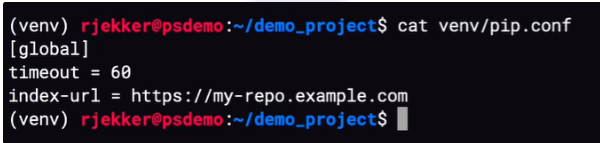

Now when we run the `pip` command, it will automatically point to the configured custom repository for downloading packages instead of **PyPI** and we don’t have to specify the `--index-url` switch in every `pip` command anymore.

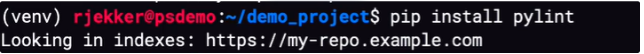

# Review

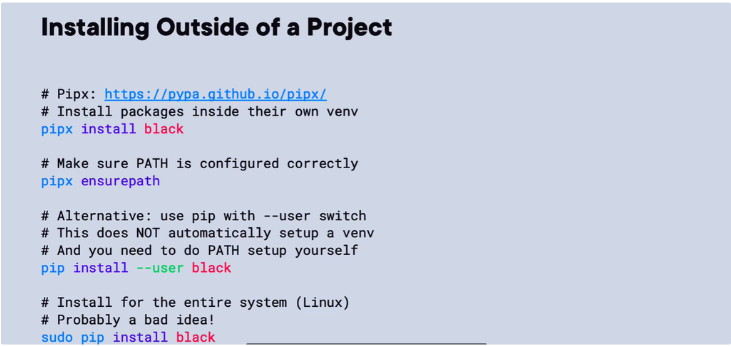

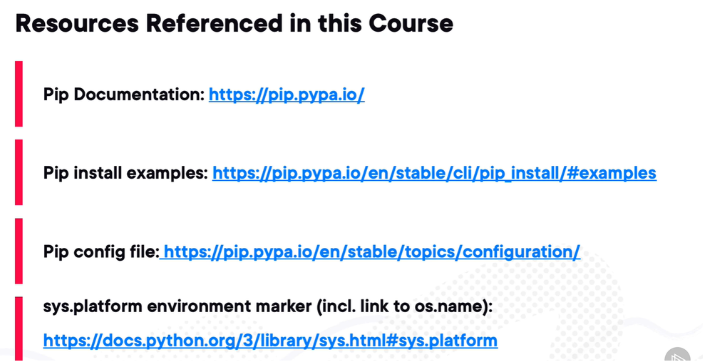

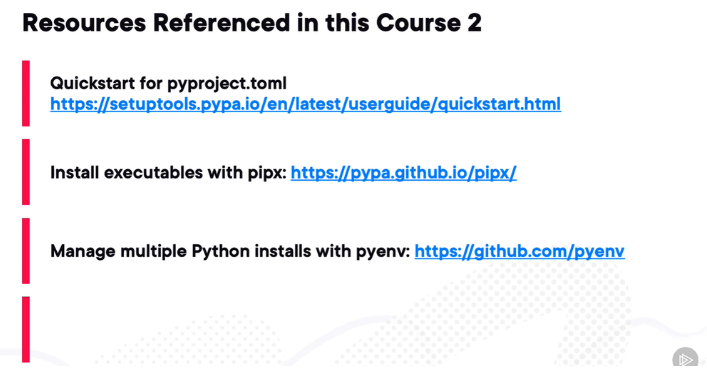